# **Flooding in DRC/Rwanda - working code for trend analysis**

In [1]:
source("../00_model-fitting/wwa_model-fitting.R")

variable = "rx5day-mam"
region = "shapefile"
region_name = "DRC/Rwanda region"

---
## **RX5day precip (GEV)**

In [3]:
# loop over gridded obs products, fit GEV
gmst <- load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst"))

obs_fitted <- sapply(c("mswep", "chirps", "cpc", "era5", "tamsat"), function(fnm) {
    df <- merge(gmst, load_ts(paste0("ts/drc-rw-floods_",variable,"_", fnm, "_", region,".dat"), col.names = c("year", "pr")))
    fit_ns("gev", "fixeddisp", df, "pr", "gmst", lower = F)
}, simplify = F)

# set covariates
gmst_2023 <- gmst$gmst[gmst$year == 2023]

In [4]:
set.seed(42)
obs_ci <- t(sapply(obs_fitted, function(mdl) {
    zz <- boot_ci(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, nsamp = 1000)
    unlist(sapply(rownames(zz), function(a) c(zz[a,]), simplify = F))
}))
write.csv(obs_ci, paste0("res-obs_", variable, "_", region, ".csv"))

In [4]:
# return level plots
prep_window(c(2,3))

png(paste0("fig/obs_return-levels_",variable,"_",region,".png"), width = 540*3, height = 540*2); {
    par(mfrow = c(2,3), cex = 1.4, lwd = 3, oma = c(0,0,2,0))
    invisible(sapply(1:5, function(i) {
        mdl <- obs_fitted[[i]]
        plot_returnlevels(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, main = names(obs_fitted)[i], ylim = c(20,200))
    }))
    plot.new()
    legend("left", legend = c("Present climate", "Counterfactual climate", "Observed event"), col = c("firebrick", "blue", "magenta"), lty = 1, pch = c(20,20,NA), bty = "n")
    mtext(paste0("Return level plots for ",variable," over ",region_name," region"), outer = T, cex = 2, font = 2)
}; dev.off()

png 
  2

In [5]:
# trend plots
prep_window(c(2,3))

png(paste0("fig/obs_trend_",variable,"_",region,".png"), width = 540*3, height = 540*2); {
    par(mfrow = c(2,3), cex = 1.4, lwd = 3, oma = c(0,0,2,0))
    invisible(sapply(1:5, function(i) {
        mdl <- obs_fitted[[i]]
        plot_trend(mdl, main = names(obs_fitted)[i], legend_pos = NA)
    }))
    plot.new()
    legend("left", legend = c("location", "1-in-6-year event", "1-in-40-year event"), lty = 1, col = c("black", "blue", "blue"), lwd = c(2,2,1), bty = "n")
    mtext(paste0("Trend in ",variable," over ",region_name," region"), outer = T, cex = 2, font = 2)
}; dev.off()

png 
  2

In [6]:
# GMST trend plots
prep_window(c(1,5))

png(paste0("fig/obs_gmst-trend_",variable,"_",region,".png"), width = 540*3, height = 540*2); {
    par(mfrow = c(2,3), cex = 1.4, lwd = 3, oma = c(0,0,2,0))
    invisible(sapply(1:5, function(i) {
        mdl <- obs_fitted[[i]]
        plot_gmsttrend(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, main = names(obs_fitted)[i], legend_pos = NA)
    }))
    plot.new()
    legend("left", legend = c("location", "1-in-6-year event", "1-in-40-year event"), lty = 1, col = c("black", "blue", "blue"), lwd = c(2,2,1), bty = "n")
    mtext(paste0("GMST trend in ",variable," over ",region_name," region"), outer = T, cex = 2, font = 2)
}; dev.off()

png 
  2

---
## **MAM precip (Gaussian)**

In [7]:
variable = "mam"
region = "26_31_-5_2"
region_name = "26E-31E, 5S-2N"

In [8]:
# loop over models, fit GEV
gmst <- load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst"))

obs_fitted <- sapply(c("mswep", "chirps", "cpc", "era5", "tamsat"), function(fnm) {
    df <- merge(gmst, load_ts(paste0("ts/drc-rw-floods_",variable,"_", fnm, "_", region,".dat"), col.names = c("year", "pr")))
    fit_ns("norm", "fixeddisp", df, "pr", "gmst", lower = F)
}, simplify = F)

# set covariates
gmst_2023 <- gmst$gmst[gmst$year == 2023]

In [9]:
obs_ci <- t(sapply(obs_fitted, function(mdl) {
    zz <- boot_ci(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, nsamp = 50)
    unlist(sapply(rownames(zz), function(a) c(zz[a,]), simplify = F))
}))
write.csv(obs_ci, paste0("res-obs_", variable, "_", region, ".csv"))

In [10]:
# return level plots
prep_window(c(2,3))

png(paste0("fig/obs_return-levels_",variable,"_",region,".png"), width = 540*3, height = 540*2); {
    par(mfrow = c(2,3), cex = 1.4, lwd = 3, oma = c(0,0,2,0))
    invisible(sapply(1:5, function(i) {
        mdl <- obs_fitted[[i]]
        plot_returnlevels(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, main = names(obs_fitted)[i], ylim = c(200,1200))
    }))
    plot.new()
    legend("left", legend = c("Present climate", "Counterfactual climate", "Observed event"), col = c("firebrick", "blue", "magenta"), lty = 1, pch = c(20,20,NA), bty = "n")
    mtext(paste0("Return level plots for ",variable," over ",region_name," region"), outer = T, cex = 2, font = 2)
}; dev.off()

png 
  2

In [11]:
# trend plots
prep_window(c(2,3))

png(paste0("fig/obs_trend_",variable,"_",region,".png"), width = 540*3, height = 540*2); {
    par(mfrow = c(2,3), cex = 1.4, lwd = 3, oma = c(0,0,2,0))
    invisible(sapply(1:5, function(i) {
        mdl <- obs_fitted[[i]]
        plot_trend(mdl, main = names(obs_fitted)[i], legend_pos = NA)
    }))
    plot.new()
    legend("left", legend = c("location", "1-in-6-year event", "1-in-40-year event"), lty = 1, col = c("black", "blue", "blue"), lwd = c(2,2,1), bty = "n")
    mtext(paste0("Trend in ",variable," over ",region_name," region"), outer = T, cex = 2, font = 2)
}; dev.off()

png 
  2

In [12]:
# GMST trend plots
prep_window(c(1,5))

png(paste0("fig/obs_gmst-trend_",variable,"_",region,".png"), width = 540*3, height = 540*2); {
    par(mfrow = c(2,3), cex = 1.4, lwd = 3, oma = c(0,0,2,0))
    invisible(sapply(1:5, function(i) {
        mdl <- obs_fitted[[i]]
        plot_gmsttrend(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, main = names(obs_fitted)[i], legend_pos = NA)
    }))
    plot.new()
    legend("left", legend = c("location", "1-in-6-year event", "1-in-40-year event"), lty = 1, col = c("black", "blue", "blue"), lwd = c(2,2,1), bty = "n")
    mtext(paste0("GMST trend in ",variable," over ",region_name," region"), outer = T, cex = 2, font = 2)
}; dev.off()

png 
  2

---
## **Plots for scientific report**

In [1]:
source("../00_model-fitting/wwa_model-fitting.R")

### **RX5day**

In [36]:
# loop over gridded obs products, fit GEV
df <- merge(load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")),
            load_ts(paste0("ts/drc-rw-floods_rx5day-mam_chirps_shapefile.dat"), col.names = c("year", "pr")))

gmst_2023 <- df$gmst[df$year == 2023]

mdl <- fit_ns("gev", "fixeddisp", df, "pr", "gmst", lower = F)

In [47]:
boot_ci(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, nsamp = 1000)

,bestimate,2.5%,97.5%
mu0,45.42612,41.14721,4.961975e+01
sigma0,6.74773,5.15526,8.172510e+00
alpha,-3.49160,-12.71205,6.682650e+00
shape,0.05330,-0.09930,2.543300e-01
disp,0.14854,0.11712,1.738000e-01
event_magnitude,92.69010,92.69010,9.269010e+01
return_period,385.01909,47.13330,3.512222e+06
PR,0.40626,0.00012,4.453330e+00
dI_abs,-8.95605,-40.57576,1.429928e+01
dI_rel,-8.81101,-30.44723,1.824118e+01


In [46]:
boot_ci(mdl, cov = df$gmst[df$year == 1985], cov_cf = gmst_2023 - 1.2, nsamp = 1000, ev = df$pr[df$year == 1985])

,bestimate,2.5%,97.5%
mu0,45.42612,41.11757,49.60841
sigma0,6.74773,5.15798,8.16986
alpha,-3.49160,-12.82877,6.67409
shape,0.05330,-0.10476,0.25340
disp,0.14854,0.11714,0.17375
event_magnitude,83.98977,83.98977,83.98977
return_period,89.35093,22.38104,892.39402
PR,0.70065,0.11661,1.86698
dI_abs,-3.33450,-14.16749,5.72080
dI_rel,-3.81853,-14.43342,7.30918


In [4]:
png(paste0("fig/obs-results_rx5day-mam_chirps.png"), width = 540*2, height = 540*1); {
    par(mfrow = c(1,2), cex = 1.4)
    ylim = c(20,150)
    plot_gmsttrend(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, main = "(a) Fitted trend in GMST", legend_pos = NA, ylim = ylim)
    plot_returnlevels(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, main = "(b) Return level plots", ylim = ylim)
}; dev.off()

png 
  2

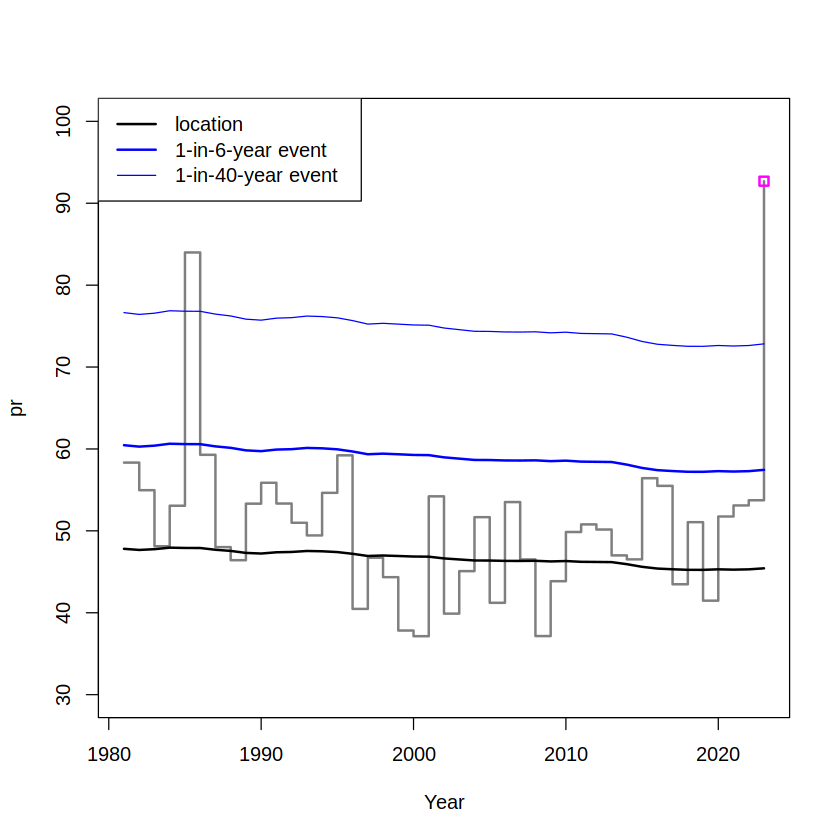

In [5]:
plot_trend(mdl)


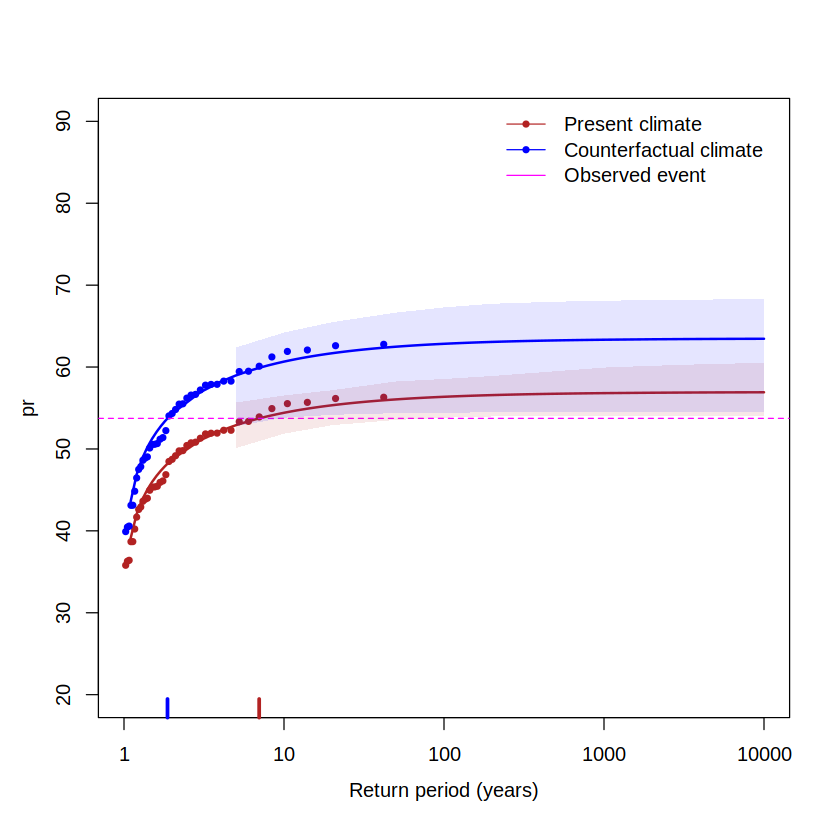

In [61]:
# is it just those two outliers ruining the fit?
df <- merge(load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")),
            load_ts(paste0("ts/drc-rw-floods_rx5day-mam_chirps_shapefile.dat"), col.names = c("year", "pr")))

rx5_cleaned_fit <- fit_ns("gev", "fixeddisp", df[df$pr < 80,], "pr", "gmst", lower = F)

plot_returnlevels(rx5_cleaned_fit, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, ylim = c(20,90))

# well... yes

### **MAM**

In [48]:
# loop over gridded obs products, fit GEV
df <- merge(load_ts("ts/drc-rw-floods_gmst-smoothed.dat", col.names = c("year", "gmst")),
            load_ts(paste0("ts/drc-rw-floods_mam_chirps_shapefile.dat"), col.names = c("year", "pr")))

gmst_2023 <- df$gmst[df$year == 2023]

mdl <- fit_ns("norm", "fixeddisp", df, "pr", "gmst", lower = F)

In [49]:
boot_ci(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, nsamp = 1000)


,bestimate,2.5%,97.5%
mu0,472.11343,445.78665,497.98104
sigma0,45.56274,32.65673,54.27381
alpha,12.15273,-47.97908,82.06044
disp,0.09651,0.07125,0.11342
event_magnitude,556.42550,556.42550,556.42550
return_period,31.12979,8.39773,1043.51033
PR,2.51842,0.01392,2298.22952
dI_abs,16.92487,-76.98505,100.12912
dI_rel,3.13714,-12.15405,21.94390


In [28]:
png(paste0("fig/obs-results_mam_chirps.png"), width = 540*2, height = 540*1); {
    par(mfrow = c(1,2), cex = 1.4)
    ylim = c(200,800)
    plot_gmsttrend(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, main = "(a) Fitted trend in GMST", legend_pos = NA, ylim = ylim)
    plot_returnlevels(mdl, cov = gmst_2023, cov_cf = gmst_2023 - 1.2, legend_pos = NA, nsamp = 500, main = "(b) Return level plots", ylim = ylim)
}; dev.off()

png 
  2

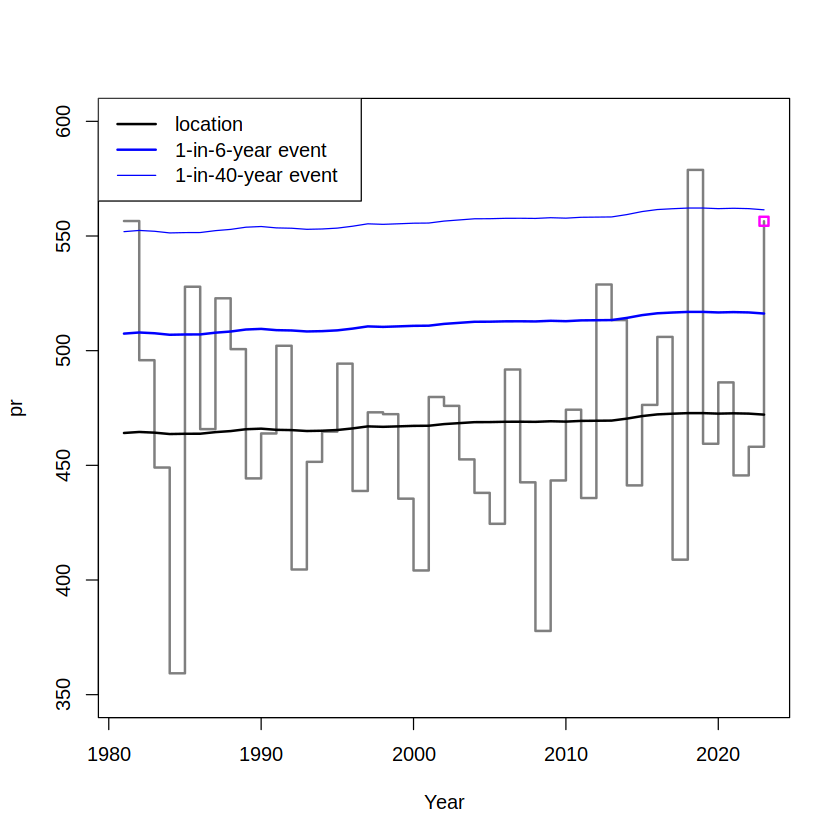

In [9]:
plot_trend(mdl)